In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print(f'Shape of the the dataset is {X.shape}')

Shape of the the dataset is (3276, 9)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [ ]:
X.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

In [ ]:
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [ ]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

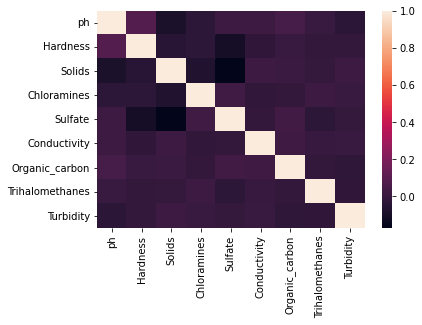

In [ ]:
sns.heatmap(X.corr())

In [ ]:
X1 = X.fillna(X.mean())
X1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [ ]:
X1.isnull().sum().sum()

0

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X1, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
y_train.value_counts()

0    1604
1    1592
Name: Potability, dtype: int64

In [ ]:
y_test.value_counts()

1    406
0    394
Name: Potability, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
lr = LogisticRegression()

grid = {"C":10.0**np.arange(-2, 3), 'penalty':['l1', 'l2']}
cv = KFold(n_splits = 5)
classifier = GridSearchCV(lr, grid, cv = cv, scoring = 'f1_macro', n_jobs = -1)

classifier.fit(X_train_std, y_train)
cm = confusion_matrix(classifier.predict(X_test_std), y_test)
print(cm)
print(classification_report(classifier.predict(X_test_std), y_test))

[[223 212]
 [171 194]]
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       435
           1       0.48      0.53      0.50       365

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.53      0.52      0.52       800



## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
class_rfc2 = RandomForestClassifier(n_estimators = 125)
class_rfc2.fit(X_train, y_train)
cm = confusion_matrix(class_rfc2.predict(X_test), y_test)
print(cm)
print(classification_report(class_rfc2.predict(X_test), y_test))

[[271 134]
 [123 272]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       405
           1       0.67      0.69      0.68       395

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



In [ ]:
random_grid = {'n_estimators': [150, 200, 300], 'max_features':['auto', 'sqrt']}

rf = RandomForestClassifier()
cv = KFold(n_splits = 5)

classifier_2 = GridSearchCV(rf, random_grid, cv = cv, scoring = 'f1_macro', n_jobs = -1)

classifier_2.fit(X_train, y_train)
cm = confusion_matrix(classifier_2.predict(X_test), y_test)
print(cm)
print(classification_report(classifier_2.predict(X_test), y_test))

[[281 120]
 [113 286]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       401
           1       0.70      0.72      0.71       399

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800



## XGBoosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

cm = confusion_matrix(xgb.predict(X_test), y_test)
print(cm)
print(classification_report(xgb.predict(X_test), y_test))

[[259 153]
 [135 253]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       412
           1       0.62      0.65      0.64       388

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.64       800
weighted avg       0.64      0.64      0.64       800



# Save the model

In [ ]:
import pickle
pickle.dump(classifier_2, open('classifier.pickle', 'wb'))